In [1]:
import pandas as pd

df = pd.read_csv("hf://datasets/USC-MOLA-Lab/MFRC/final_mfrc_data.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61226 entries, 0 to 61225
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   text        61226 non-null  object
 1   subreddit   61226 non-null  object
 2   bucket      61226 non-null  object
 3   annotator   61226 non-null  object
 4   annotation  61226 non-null  object
 5   confidence  61184 non-null  object
dtypes: object(6)
memory usage: 2.8+ MB


In [2]:
df.head()

,text,subreddit,bucket,annotator,annotation,confidence
0,That particular part of the debate is especial...,europe,French politics,annotator03,Non-Moral,Confident
1,That particular part of the debate is especial...,europe,French politics,annotator01,Purity,Confident
2,That particular part of the debate is especial...,europe,French politics,annotator02,Thin Morality,Confident
3,"/r/france is pretty lively, with it's own ling...",europe,French politics,annotator03,Non-Moral,Confident
4,"/r/france is pretty lively, with it's own ling...",europe,French politics,annotator00,Non-Moral,Somewhat Confident


In [3]:
import numpy as np

cats = [
'Non-Moral',
'Thin Morality',
'Care',
'Authority',
'Equality',
'Proportionality',
'Loyalty',
'Purity'
]

for cat in cats:
    df[cat] = np.where(df.annotation.str.contains(cat), 1, 0)

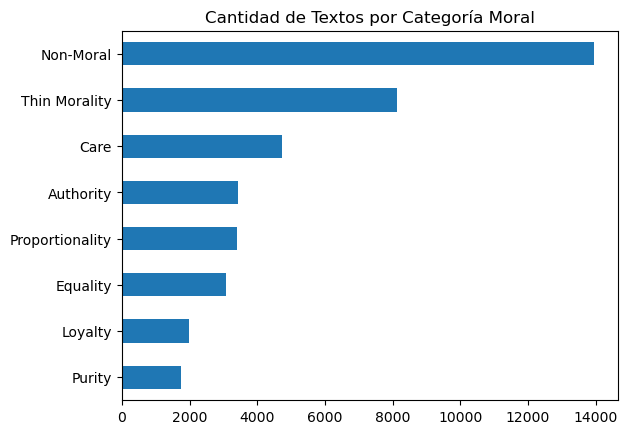

In [4]:
from matplotlib import pyplot as plt

df.groupby('text').agg({'Non-Moral':'max',
'Thin Morality':'max',
'Care':'max',
'Authority':'max',
'Equality':'max',
'Proportionality':'max',
'Loyalty':'max',
'Purity':'max'}).sum().sort_values().plot(kind = 'barh')

plt.title('Cantidad de Textos por Categoría Moral');
plt.savefig('plot categorias.png')

In [5]:
info = df.groupby('confidence').agg({'Non-Moral':'sum',
'Thin Morality':'sum',
'Care':'sum',
'Authority':'sum',
'Equality':'sum',
'Proportionality':'sum',
'Loyalty':'sum',
'Purity':'sum'})

info

,Non-Moral,Thin Morality,Care,Authority,Equality,Proportionality,Loyalty,Purity
confidence,,,,,,,,
Confident,24190,7329,5883,2908,3980,3486,1943,1679
Not Confident,2659,2164,776,1042,482,405,298,188
Somewhat Confident,3913,1620,1090,851,633,692,549,300


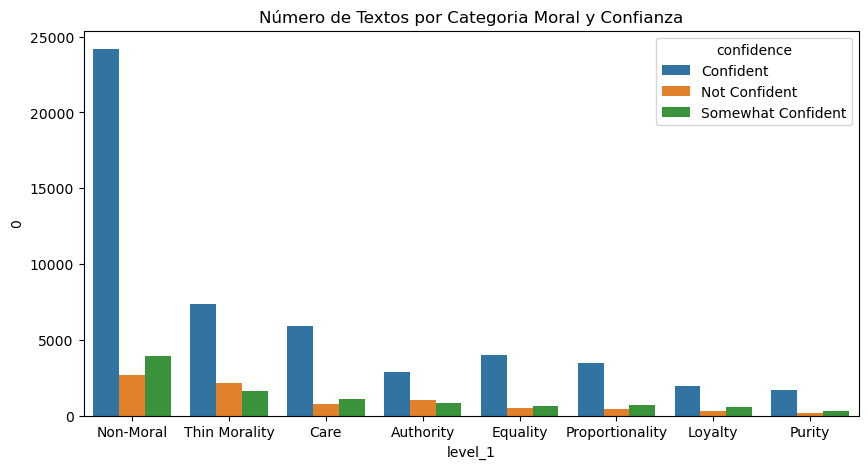

In [6]:
import seaborn as sns

fig, ax = plt.subplots(figsize = (10, 5))

sns.barplot(data = info.stack().reset_index(),
            x = 'level_1',
            y = 0,
            hue = 'confidence')

ax.set_title('Número de Textos por Categoria Moral y Confianza')
plt.savefig('plot categorias confianza.png')

In [7]:
df.text.nunique()

17886

In [8]:
df.annotation.value_counts()

annotation
Non-Moral                                          30770
Thin Morality                                      11113
Care                                                3882
Authority                                           3111
Equality                                            2442
                                                   ...  
Equality,Proportionality,Care,Loyalty,Authority        1
Proportionality,Care,Authority                         1
Purity,Proportionality,Authority                       1
Proportionality,Authority,Loyalty,Equality             1
Authority,Loyalty                                      1
Name: count, Length: 128, dtype: int64

In [9]:
df.bucket.value_counts()

bucket
French politics      25079
US Politics          18723
Everyday Morality    17424
Name: count, dtype: int64

In [10]:
df.confidence.value_counts()

confidence
Confident             44737
Somewhat Confident     8920
Not Confident          7527
Name: count, dtype: int64

In [11]:
df.annotator.value_counts()

annotator
annotator04    11988
annotator00    11978
annotator03    11971
annotator01    11968
annotator02    11952
annotator05     1369
Name: count, dtype: int64

Non-Moral
Thin Morality
Care
Authority
Equality
Proportionality
Loyalty
Purity

In [13]:
pd.Series(df.text.unique()).str.len().describe()

count    17886.000000
mean       198.644023
std        131.396352
min         33.000000
25%         96.000000
50%        157.000000
75%        268.000000
max       1151.000000
dtype: float64

# Creación de nube de palabras por categoría moral.

In [14]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import pandas as pd
import spacy
from nltk.corpus import stopwords
import nltk

# Descargar las stopwords de NLTK
nltk.download('stopwords')

# Cargar stopwords en inglés
stop_words = set(stopwords.words('english'))

# Cargar el modelo de spaCy para lematización
nlp = spacy.load('en_core_web_sm')

def procesar_texto(texto):
    """
    Procesa el texto aplicando lematización y eliminando stopwords.

    Parámetro:
    - texto: String con el texto a procesar.

    Retorna:
    - Un string procesado.
    """
    # Procesar el texto con spaCy
    doc = nlp(texto.lower())
    # Filtrar y lematizar palabras que no sean stopwords ni puntuación
    palabras = [token.lemma_ for token in doc if token.lemma_ not in stop_words and token.is_alpha]
    return ' '.join(palabras)

def generar_wordcloud(df, columna_texto, ancho=800, alto=400, max_palabras=200, background_color='white'):
    """
    Genera una nube de palabras a partir de una columna de texto en un DataFrame con lematización y eliminación de stopwords.

    Parámetros:
    - df: DataFrame que contiene los datos.
    - columna_texto: Nombre de la columna que contiene el texto.
    - ancho: Ancho de la imagen de la nube de palabras.
    - alto: Alto de la imagen de la nube de palabras.
    - max_palabras: Número máximo de palabras a mostrar en la nube.
    - background_color: Color de fondo de la nube de palabras.
    """
    # Concatenar y procesar todos los textos de la columna en un solo string
    texto = " ".join(df[columna_texto].dropna().tolist())
    texto_procesado = procesar_texto(texto)

    # Generar la nube de palabras
    wordcloud = WordCloud(width=ancho, height=alto, max_words=max_palabras, background_color=background_color).generate(texto_procesado)

    # Mostrar la nube de palabras
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

[nltk_data] Downloading package stopwords to /Users/luis/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [15]:
cloud_df = df.groupby('text').agg({'Non-Moral':'max',
'Thin Morality':'max',
'Care':'max',
'Authority':'max',
'Equality':'max',
'Proportionality':'max',
'Loyalty':'max',
'Purity':'max'}).reset_index()

In [16]:
cloud_df

,text,Non-Moral,Thin Morality,Care,Authority,Equality,Proportionality,Loyalty,Purity
0,"\n\nDr. Robert Jay Lifton, distinguished profe...",1,1,0,1,0,0,0,0
1,\n\nIf you prefer not to click on Daily Mail s...,1,0,0,0,0,0,0,0
2,\n&gt;Ben Judah details Emmanuel Macron's nasc...,0,0,0,1,0,1,0,0
3,"\n&gt;Ergo, he supports Macron but doesn't wan...",1,1,0,0,0,0,1,0
4,\n&gt;He looks exactly the same in Richie Rich...,1,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
17881,🏅 Take this poor bitch's gold! I CAN'T STOP LA...,1,0,0,0,0,0,0,0
17882,"😂 republicans response to Cohen, “This guys a ...",1,0,0,1,0,0,0,0
17883,"😆 yes, full name is Lucy Clawless: Princess Wa...",1,0,0,0,0,0,0,0
17884,😱 \n\nNo but seriously now. It doesn't take a ...,1,0,0,0,0,0,1,0


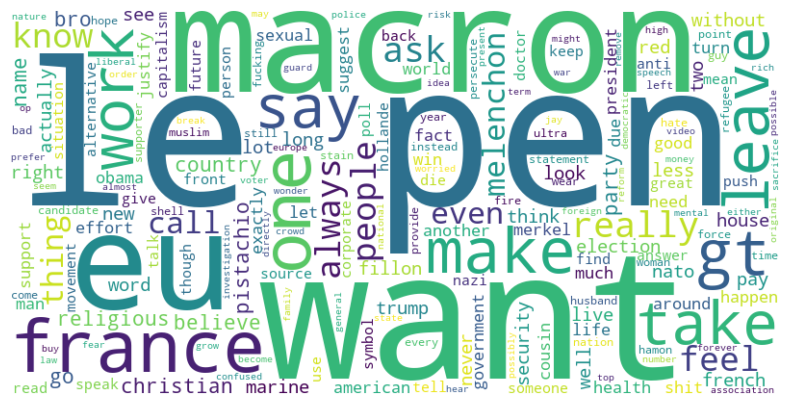

<Figure size 640x480 with 0 Axes>

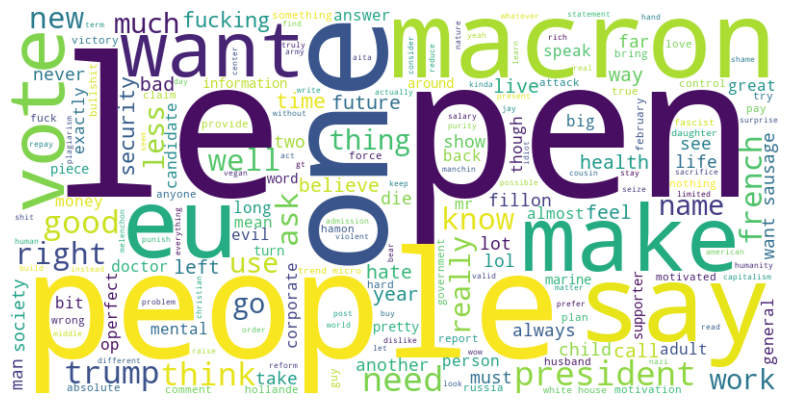

<Figure size 640x480 with 0 Axes>

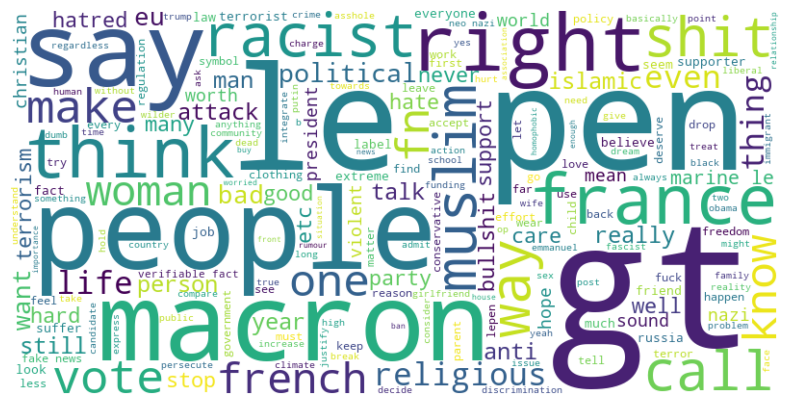

<Figure size 640x480 with 0 Axes>

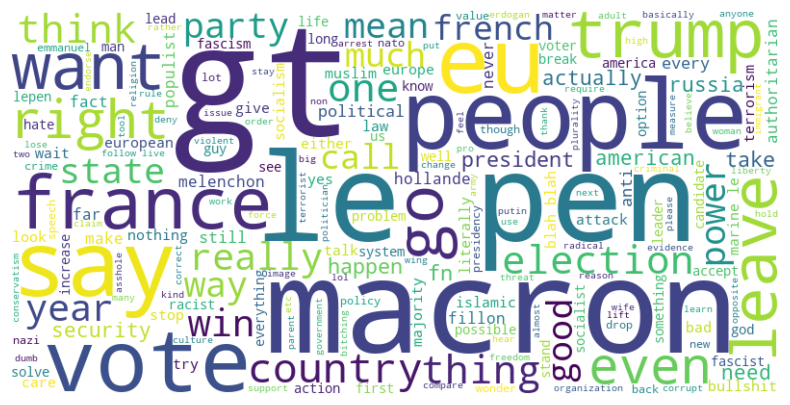

<Figure size 640x480 with 0 Axes>

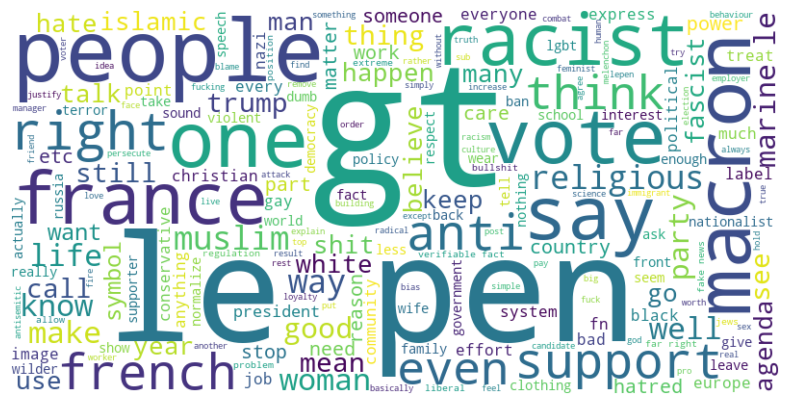

<Figure size 640x480 with 0 Axes>

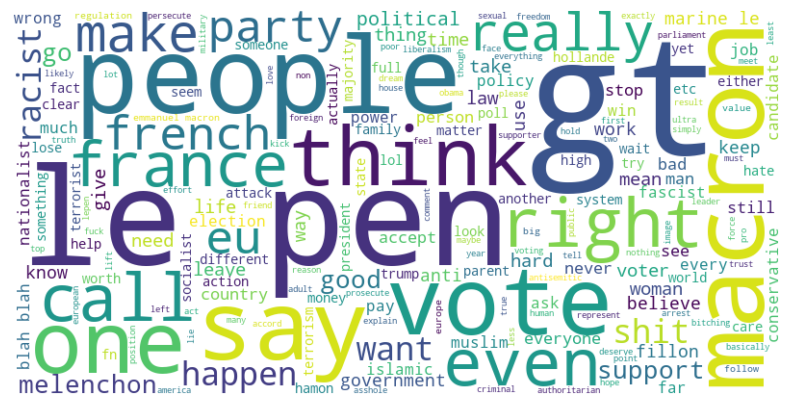

<Figure size 640x480 with 0 Axes>

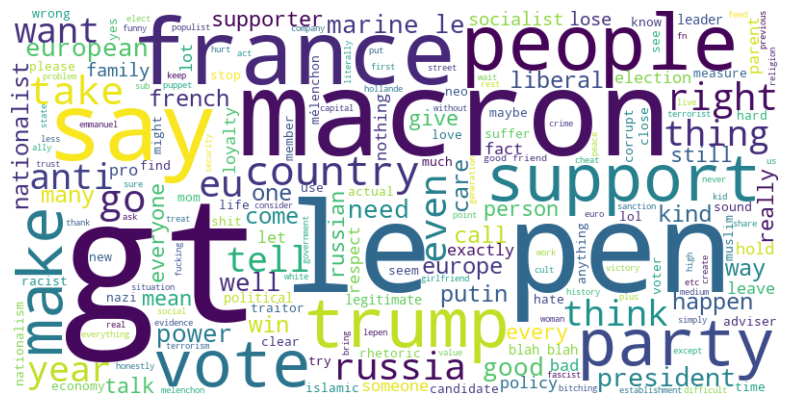

<Figure size 640x480 with 0 Axes>

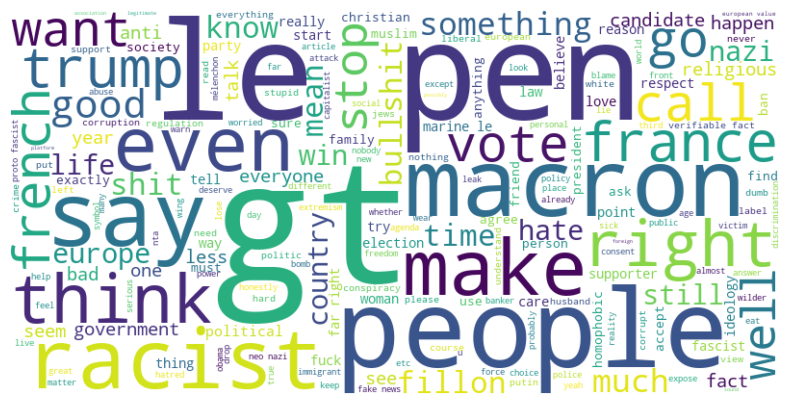

<Figure size 640x480 with 0 Axes>

In [17]:
for cat in cats:
    generar_wordcloud(cloud_df[cloud_df[cat] == 1].head(100), 'text');
    plt.savefig(cat + '_cloud.png')